In [ ]:
## get the data
!wget http://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip

--2020-10-01 06:37:22--  http://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip
Resolving mklab.iti.gr (mklab.iti.gr)... 160.40.50.223
Connecting to mklab.iti.gr (mklab.iti.gr)|160.40.50.223|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip [following]
--2020-10-01 06:37:23--  https://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip
Connecting to mklab.iti.gr (mklab.iti.gr)|160.40.50.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4022804823 (3.7G) [application/zip]
Saving to: ‘CERTH_ImageBlurDataset.zip’

CERTH_ImageBlurData 100%[===================>]   3.75G  12.0MB/s    in 7m 6s   

2020-10-01 06:44:29 (9.00 MB/s) - ‘CERTH_ImageBlurDataset.zip’ saved [4022804823/4022804823]



In [ ]:
!unzip CERTH_ImageBlurDataset.zip  ##unzip it

Archive:  CERTH_ImageBlurDataset.zip
   creating: CERTH_ImageBlurDataset/
   creating: CERTH_ImageBlurDataset/EvaluationSet/
   creating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_1.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_10.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_11.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_12.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_13.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_14.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_15.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_16.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_17.jpg  
  inflating: CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10

In [1]:
from fastai.vision import *
from fastai import *
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
## run only when using colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls CERTH_ImageBlurDataset/TrainingSet/

In [3]:
classes =["Artificially-Blurred","Naturally-Blurred","Undistorted"]

In [4]:
path = Path("/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/")
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=1000)  ## verifying if images is proper

Artificially-Blurred


Naturally-Blurred


Undistorted


In [5]:
path.ls()

[PosixPath('/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/NewDigitalBlur.rar'),
 PosixPath('/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/Naturally-Blurred'),
 PosixPath('/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/Undistorted'),
 PosixPath('/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/Artificially-Blurred'),
 PosixPath('/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/.ipynb_checkpoints'),
 PosixPath('/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/models'),
 PosixPath('/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/export.pkl')]

In [ ]:
## renaming images

path = '/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/Artificially-Blurred/'
files = os.listdir(path)

for index, file in enumerate(files):
  os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.jpg'])))


path = '/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/Naturally-Blurred/'
files = os.listdir(path)

for index, file in enumerate(files):

  os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.jpg'])))


path = '/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/Undistorted/'
files = os.listdir(path)

for index, file in enumerate(files):

  os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.jpg'])))

In [6]:
path = '/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet/'

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes


['Artificially-Blurred', 'Naturally-Blurred', 'Undistorted']

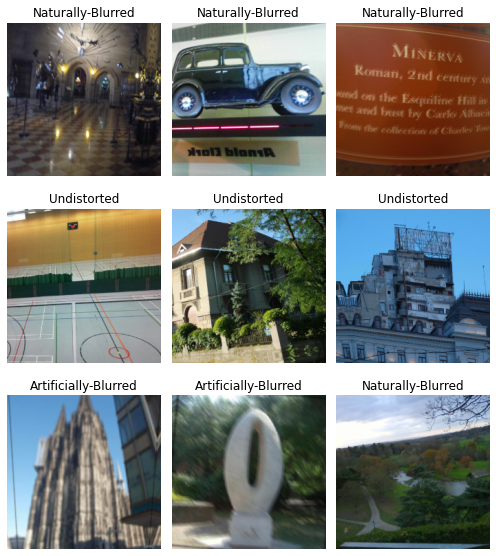

In [ ]:
data.show_batch(rows=3, figsize=(7,8))


In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['Artificially-Blurred', 'Naturally-Blurred', 'Undistorted'], 3, 800, 200)

In [ ]:
# train model

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
## training model


# defaults.device = torch.device('cuda')    ## only when working locally
# learn.fit_one_cycle(4)

Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please s

In [ ]:
# learn.save('/content/drive/My Drive/dataset/models/model_1_stage_2')

In [ ]:
# from google.colab import files
# files.download("/content/CERTH_ImageBlurDataset/TrainingSet/models/model_train_1.pth")  # save model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
learn.load("/content/drive/My Drive/dataset/models/model_1_stage_3")
# learn.load("/content/drive/My Drive/dataset/models/model_train_1")

Learner(data=ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Naturally-Blurred,Naturally-Blurred,Naturally-Blurred,Naturally-Blurred,Naturally-Blurred
Path: /content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Undistorted,Undistorted,Undistorted,Undistorted,Undistorted
Path: /content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/TrainingSet;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, d

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


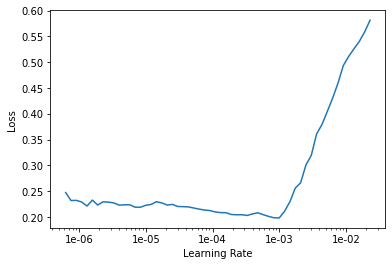

In [13]:
learn.recorder.plot()


In [14]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


In [ ]:
## optimal lr would be 1e-03 as per our plot

In [15]:
path = Path("/content/drive/My Drive/dataset/models")
learn.save(path/"model_1_stage_4")

In [16]:
## evaluating

interp = ClassificationInterpretation.from_learner(learn)


196 misclassified samples over 200 samples in the validation set.


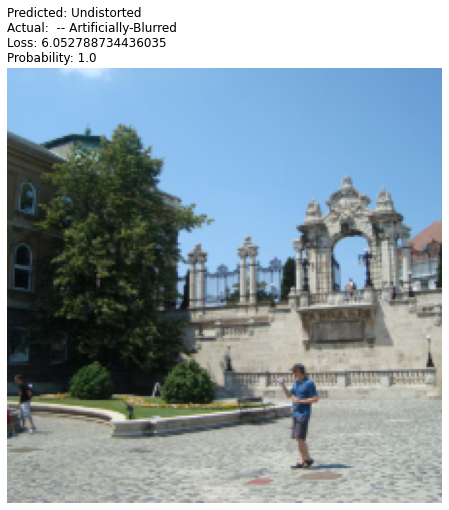

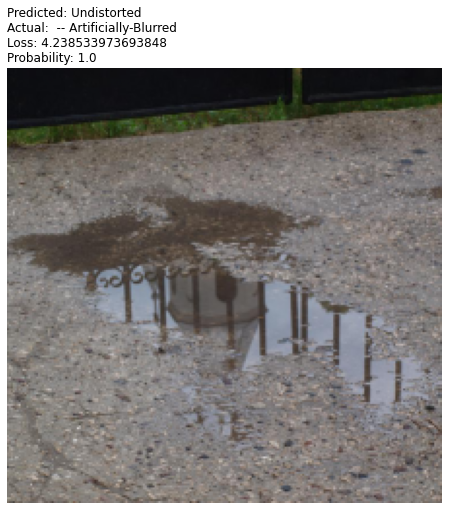

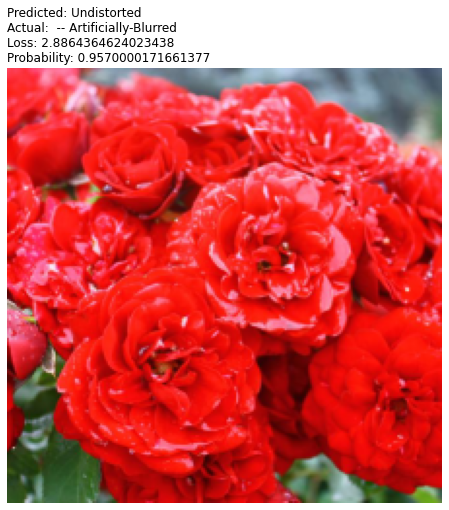

In [18]:
interp.plot_multi_top_losses()  # these are some of our top losses

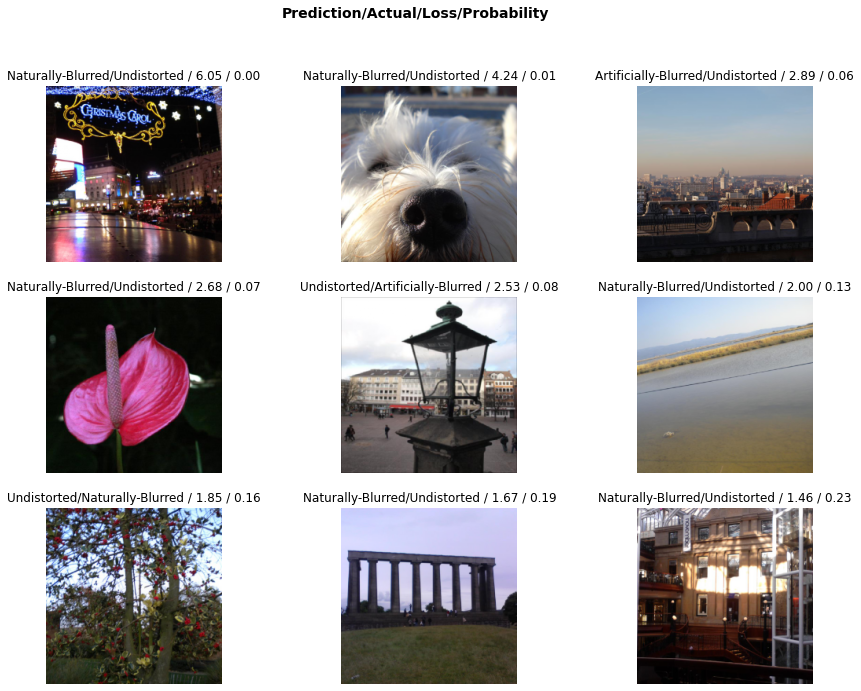

In [19]:
interp.plot_top_losses(k=9,figsize=(15,11))

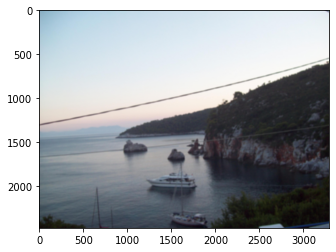

In [27]:
## simple testing of our model
img=plt.imread("/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet/DiskR10_1.jpg")
plt.imshow(img)


In [ ]:
data.classes, data.c, len(data.train_ds),len(data.valid_ds)  

(['Artificially-Blurred', 'Naturally-Blurred', 'Undistorted'], 3, 800, 200)

(Category tensor(2), tensor(2), tensor([0.0067, 0.3325, 0.6608]))


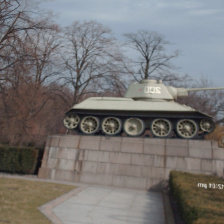

In [ ]:
test_img = learn.data.train_ds[0][0]
print(learn.predict(test_img))

data.train_ds[0][0]

In [20]:
## testing for naturalBlurSet and digitalBlurSet

natural_blurset_path = Path("/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet")
digital_blurset_path = Path("/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet")

In [21]:
## preparing images for testing

path = '/content/drive/My Drive/dataset/CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/EvaluationSet/'

np.random.seed(42)
testData = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
testData.classes  ## test class categories

['DigitalBlurSet', 'NaturalBlurSet']

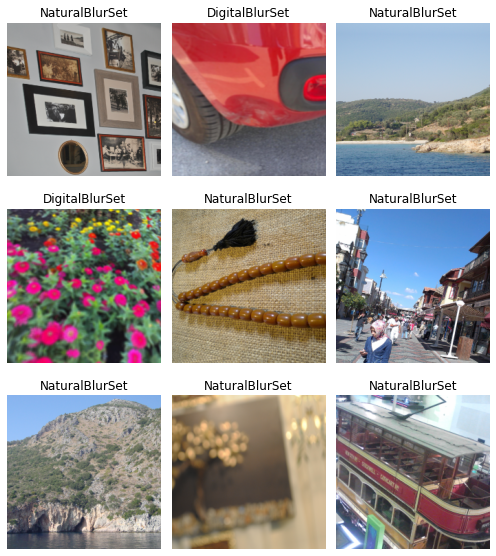

In [ ]:
testData.show_batch(rows=3, figsize=(7,8))


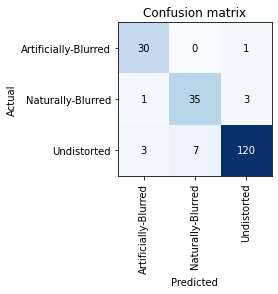

In [17]:
interp.plot_confusion_matrix()   ###  from this we can calculate the overall accuracy of around 92.5% 

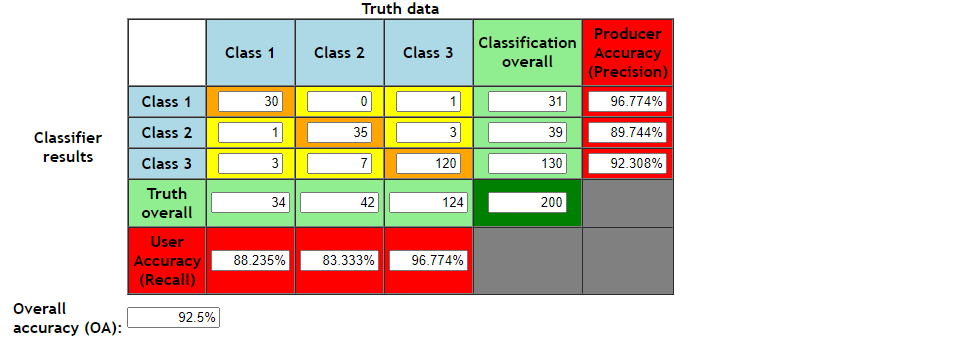

**Category Tensor representation**

Output  -->    Interpretation
1.   Tensor - 0 -> Artificially-Blurred
2.   Tensor - 1 -> Naturally-Blurred
3.   Tensor - 2 -> Undistorted

In general if we get 0-1 we can say the image is Blurred otherwise it is predicted undistored 

In [32]:
preds =[]
for i in range(len(testData.train_ds)):
  test_img = testData.train_ds[i][0]
  result = learn.predict(test_img)[0] ## show the category of our predictions 
  preds.append(result)
preds_df = pd.DataFrame(preds,columns=["predictions"])

In [34]:
preds_df.to_csv("preds.csv")  ## store the results